In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch
from datetime import datetime, timedelta

sns.set_style({'font.sans-serif':'Laksaman'})
#sns.set_style('whitegrid', {'font.sans-serif':'Laksaman'})

In [6]:
dr = pd.read_csv("./datasets_clean/all_reactors.csv")

#dr = dr.loc[dr['Country']=='JAPAN', :]
#dr = da.sort_values(by='Start')[0:100].copy(deep=True)

## Add order for plotting
dr['current_num'] = np.arange(len(dr))
dr['ctime_y'] = dr["Construction_time"]/365.0

##
# Since the first reactor in the database starts at 1951, we round down the axis to 1950, to have round numbers
mintime = datetime(1950, 1, 1)#datetime.strptime(min(dr['Start']), "%Y-%m-%d")
maxtime = datetime(2020, 12, 31)

endtime_int = (maxtime-mintime).days/365.0

dr['ctime_start'] = (pd.to_datetime(dr['Start']) - mintime).dt.days/365.0

lendays = (maxtime-mintime).days
leny = lendays/365
dr = dr.sort_values(by='Start', ascending=False)

#### Color type
c_dict = {'PWR  ':'#377eb8',
          'BWR  ':'#ff7f00',
          'GCR  ':'#4daf4a',
          'PHWR ':'#f781bf',
          'FBR  ':'#a65628',
          'LWGR ':'#984ea3',
          'HWLWR':'#999999',
          'HTGR ':'#dede00',
          'HWGCR':'#dede00',
          'SGHWR':'#dede00',
          'X    ':'#dede00'}
#                  , , ,
#                  , , 
#c_dict = {'PWR  ':'#E64646', 'BWR  ':'#7FFF00', 'GCR  ':'#E69646', 'PHWR ':'#E69646','FBR  ':'#3475D0', 'LWGR ':'#8A7C79','HWLWR':'#3475D0','HTGR ':'#3475D0', 'HWGCR':'#3475D0', 'SGHWR':'#3475D0', 'X    ':'#3475D0'}
dr['color_type'] = dr['Type']
dr.replace({"color_type": c_dict}, inplace=True)

In [7]:
dr.tail()

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,...,Start,Connection,Operation,Shutdown,Construction_time,Online,current_num,ctime_y,ctime_start,color_type
129,UK,GB -14,DOUNREAY DFR,FBR,NaN,60,15,11,UKAEA,UKAEA,...,1955-03-01,1962-10-01,1962-10-01 00:00:00,1977-03-01,2771,False,129,7.591781,5.164384,#a65628
181,USA,US -001,SHIPPINGPORT,PWR,NaN,236,68,60,DOE DUQU,WH,...,1954-01-01,1957-12-01,1958-05-01 00:00:00,1982-10-01,1430,False,181,3.917808,4.002740,#377eb8
122,UK,GB -1B,CALDER HALL-2,GCR,NaN,268,60,49,SL,UKAEA,...,1953-08-01,1957-02-01,1957-02-01 00:00:00,2003-03-01,1280,False,122,3.506849,3.583562,#4daf4a
121,UK,GB -1A,CALDER HALL-1,GCR,NaN,268,60,49,SL,UKAEA,...,1953-08-01,1956-08-01,1956-10-01 00:00:00,2003-03-01,1096,False,121,3.002740,3.583562,#4daf4a
93,RUSSIA,RU -1,APS-1 OBNINSK,LWGR,NaN,30,6,5,MSM,MSM,...,1951-01-01,1954-06-01,1954-12-01 00:00:00,2002-04-01,1247,False,93,3.416438,1.000000,#984ea3


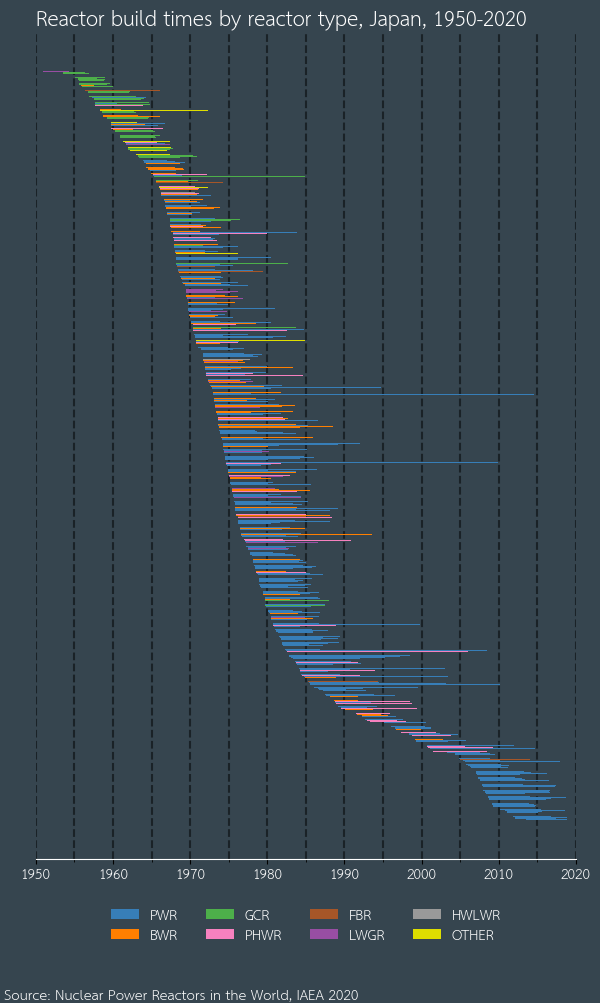

In [8]:
##### PLOT #####
facecolor = '#36454F'

fig, (ax, ax1) = plt.subplots(2, figsize=(6,10), gridspec_kw={'height_ratios':[10, 1]}, facecolor=facecolor)

ax.set_facecolor(facecolor)
ax1.set_facecolor(facecolor)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])


# ticks
xticks = xticks = np.linspace(0, endtime_int+1, 8, endpoint=True)
xticks_labels = pd.date_range(mintime, end=maxtime, periods=8).strftime("%Y")
xticks_minor = np.linspace(0, endtime_int+1, 15, endpoint=True)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels, color='w')
ax.set_yticks([])


plt.setp([ax.get_xticklines()], color='w')

# align x axis
ax.set_xlim(0, 72.1)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')

#Make custon grid lines
ax.set_axisbelow(True)
#Make custom grid
for t in xticks_minor:
    ax.axvline(t, color='k', linestyle='--', alpha=0.5, zorder=-1)

# bars
ax.barh(dr.Name, dr.ctime_y, left=dr.ctime_start, height=0.6, color=dr.color_type)
#ax.barh(dr.Start, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

ax.set_title('Reactor build times by reactor type, Japan, 1950-2020', color='w', loc='left', size='x-large')

plt.tight_layout()
ax.annotate('Source: Nuclear Power Reactors in the World, IAEA 2020', xy=(3, 3), xycoords='figure points', color='w')

c_dict = {'PWR  ':'#377eb8',
          'BWR  ':'#ff7f00',
          'GCR  ':'#4daf4a',
          'PHWR ':'#f781bf',
          'FBR  ':'#a65628',
          'LWGR ':'#984ea3',
          'HWLWR':'#999999',
          'HTGR ':'#dede00',#'#e41a1c',
          'HWGCR':'#dede00',
          'SGHWR':'#dede00',
          'X    ':'#dede00'}


##### LEGENDS #####
legend_elements = [Patch(facecolor='#377eb8', label='PWR'),
                   Patch(facecolor='#ff7f00', label='BWR'),
                   Patch(facecolor='#4daf4a', label='GCR'),
                   Patch(facecolor='#f781bf', label='PHWR'),
                   Patch(facecolor='#a65628', label='FBR'),
                   Patch(facecolor='#984ea3', label='LWGR'),
                   Patch(facecolor='#999999', label='HWLWR'),
                   Patch(facecolor='#dede00', label='OTHER')
                  ]

legend = ax1.legend(handles=legend_elements, loc='upper center', ncol=4, frameon=False)
plt.setp(legend.get_texts(), color='w')

plt.savefig("ReactorBuild.png", dpi=300)
plt.show()

In [13]:
dr.to_csv("./datasets_clean/Gantt_withcolors.csv", index=False)